In [1]:
# Import the libraries
!pip install textblob
!pip install tweepy
!pip install  wordcloud
!pip install pandas
!pip install numpy

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data

df = pd.read_csv("search-mlb.csv")

In [4]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1279275268654485504,1279275268654485504,1593837966000,2020-07-04,12:46:06,CST,759251,cnn,CNN,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '759251', 'username': 'CNN'}]",NaN,NaN,NaN,NaN
1,1279273649904791556,1279273649904791556,1593837580000,2020-07-04,12:39:40,CST,25564232,actioncookbook,actioncookbook,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '25564232', 'username': 'actionco...",NaN,NaN,NaN,NaN
2,1279271501355716613,1279271501355716613,1593837068000,2020-07-04,12:31:08,CST,33511262,patdstat,patrick,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '33511262', 'username': 'PatDStat'}]",NaN,NaN,NaN,NaN
3,1279242492253138944,1279242492253138944,1593830151000,2020-07-04,10:35:51,CST,22695090,foxsportswest,FOX Sports West,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '22695090', 'username': 'FoxSport...",NaN,NaN,NaN,NaN
4,1279241739224547328,1279241739224547328,1593829972000,2020-07-04,10:32:52,CST,27801361,marcuslemonis,Marcus Lemonis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '27801361', 'username': 'marcusle...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24830,1153476571543609347,1153476571543609347,1563845219000,2019-07-23,09:26:59,CST,30223403,bendubose,Ben DuBose,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '30223403', 'username': 'BenDuBos...",NaN,NaN,NaN,NaN
24831,1153475100966117376,1153475100966117376,1563844869000,2019-07-23,09:21:09,CST,635494890,cp_astros,Chris Peixoto,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '635494890', 'username': 'cp_astr...",NaN,NaN,NaN,NaN
24832,1153471608348119041,1153471608348119041,1563844036000,2019-07-23,09:07:16,CST,17275913,ktsharp,Katie Sharp,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '17275913', 'username': 'ktsharp'}]",NaN,NaN,NaN,NaN
24833,1153470939264405509,1153470939264405509,1563843877000,2019-07-23,09:04:37,CST,867556939630354433,tribehotdogs,Tribe Hot Dogs,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '867556939630354433', 'username':...",NaN,NaN,NaN,NaN


In [5]:
# Create a function to clean the tweets

def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['tweet'] = df['tweet'].apply(cleanTxt)

# Show the cleaned tweets
df['tweet']

0        The Cleveland Indians are taking a hard look a...
1        [someone arguing in bad faith against renaming...
2        Literally buying MLB merchandise putting money...
3        Mike Trout and Joe Maddon address the MLB's re...
4        Not until we give more away... the is   Summer...
                               ...                        
24830    UPDATE: Yordan Alvarez has now passed Pujols f...
24831    The Astros are the 2nd team in MLB history to ...
24832    Yankees now have 108 RBI with bases loaded thi...
24833    8 years of hits, homers, spectacular defensive...
24834    Nelson Cruz hit his 315th HR after the age of ...
Name: tweet, Length: 24835, dtype: object

In [6]:
# Create a function to get the subjectivity

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'

df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Subjectivity,Polarity
0,1279275268654485504,1279275268654485504,1593837966000,2020-07-04,12:46:06,CST,759251,cnn,CNN,NaN,...,NaN,NaN,NaN,"[{'user_id': '759251', 'username': 'CNN'}]",NaN,NaN,NaN,NaN,0.608333,0.441667
1,1279273649904791556,1279273649904791556,1593837580000,2020-07-04,12:39:40,CST,25564232,actioncookbook,actioncookbook,NaN,...,NaN,NaN,NaN,"[{'user_id': '25564232', 'username': 'actionco...",NaN,NaN,NaN,NaN,0.166667,-0.225000
2,1279271501355716613,1279271501355716613,1593837068000,2020-07-04,12:31:08,CST,33511262,patdstat,patrick,NaN,...,NaN,NaN,NaN,"[{'user_id': '33511262', 'username': 'PatDStat'}]",NaN,NaN,NaN,NaN,0.500000,0.333333
3,1279242492253138944,1279242492253138944,1593830151000,2020-07-04,10:35:51,CST,22695090,foxsportswest,FOX Sports West,NaN,...,NaN,NaN,NaN,"[{'user_id': '22695090', 'username': 'FoxSport...",NaN,NaN,NaN,NaN,0.166667,0.125000
4,1279241739224547328,1279241739224547328,1593829972000,2020-07-04,10:32:52,CST,27801361,marcuslemonis,Marcus Lemonis,NaN,...,NaN,NaN,NaN,"[{'user_id': '27801361', 'username': 'marcusle...",NaN,NaN,NaN,NaN,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24830,1153476571543609347,1153476571543609347,1563845219000,2019-07-23,09:26:59,CST,30223403,bendubose,Ben DuBose,NaN,...,NaN,NaN,NaN,"[{'user_id': '30223403', 'username': 'BenDuBos...",NaN,NaN,NaN,NaN,0.000000,0.000000
24831,1153475100966117376,1153475100966117376,1563844869000,2019-07-23,09:21:09,CST,635494890,cp_astros,Chris Peixoto,NaN,...,NaN,NaN,NaN,"[{'user_id': '635494890', 'username': 'cp_astr...",NaN,NaN,NaN,NaN,0.131250,-0.100000
24832,1153471608348119041,1153471608348119041,1563844036000,2019-07-23,09:07:16,CST,17275913,ktsharp,Katie Sharp,NaN,...,NaN,NaN,NaN,"[{'user_id': '17275913', 'username': 'ktsharp'}]",NaN,NaN,NaN,NaN,0.593750,0.218750
24833,1153470939264405509,1153470939264405509,1563843877000,2019-07-23,09:04:37,CST,867556939630354433,tribehotdogs,Tribe Hot Dogs,NaN,...,NaN,NaN,NaN,"[{'user_id': '867556939630354433', 'username':...",NaN,NaN,NaN,NaN,0.850000,0.650000


In [7]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Subjectivity,Polarity,Analysis
0,1279275268654485504,1279275268654485504,1593837966000,2020-07-04,12:46:06,CST,759251,cnn,CNN,NaN,...,NaN,NaN,"[{'user_id': '759251', 'username': 'CNN'}]",NaN,NaN,NaN,NaN,0.608333,0.441667,Positive
1,1279273649904791556,1279273649904791556,1593837580000,2020-07-04,12:39:40,CST,25564232,actioncookbook,actioncookbook,NaN,...,NaN,NaN,"[{'user_id': '25564232', 'username': 'actionco...",NaN,NaN,NaN,NaN,0.166667,-0.225000,Negative
2,1279271501355716613,1279271501355716613,1593837068000,2020-07-04,12:31:08,CST,33511262,patdstat,patrick,NaN,...,NaN,NaN,"[{'user_id': '33511262', 'username': 'PatDStat'}]",NaN,NaN,NaN,NaN,0.500000,0.333333,Positive
3,1279242492253138944,1279242492253138944,1593830151000,2020-07-04,10:35:51,CST,22695090,foxsportswest,FOX Sports West,NaN,...,NaN,NaN,"[{'user_id': '22695090', 'username': 'FoxSport...",NaN,NaN,NaN,NaN,0.166667,0.125000,Positive
4,1279241739224547328,1279241739224547328,1593829972000,2020-07-04,10:32:52,CST,27801361,marcuslemonis,Marcus Lemonis,NaN,...,NaN,NaN,"[{'user_id': '27801361', 'username': 'marcusle...",NaN,NaN,NaN,NaN,0.500000,0.500000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24830,1153476571543609347,1153476571543609347,1563845219000,2019-07-23,09:26:59,CST,30223403,bendubose,Ben DuBose,NaN,...,NaN,NaN,"[{'user_id': '30223403', 'username': 'BenDuBos...",NaN,NaN,NaN,NaN,0.000000,0.000000,Neutral
24831,1153475100966117376,1153475100966117376,1563844869000,2019-07-23,09:21:09,CST,635494890,cp_astros,Chris Peixoto,NaN,...,NaN,NaN,"[{'user_id': '635494890', 'username': 'cp_astr...",NaN,NaN,NaN,NaN,0.131250,-0.100000,Negative
24832,1153471608348119041,1153471608348119041,1563844036000,2019-07-23,09:07:16,CST,17275913,ktsharp,Katie Sharp,NaN,...,NaN,NaN,"[{'user_id': '17275913', 'username': 'ktsharp'}]",NaN,NaN,NaN,NaN,0.593750,0.218750,Positive
24833,1153470939264405509,1153470939264405509,1563843877000,2019-07-23,09:04:37,CST,867556939630354433,tribehotdogs,Tribe Hot Dogs,NaN,...,NaN,NaN,"[{'user_id': '867556939630354433', 'username':...",NaN,NaN,NaN,NaN,0.850000,0.650000,Positive


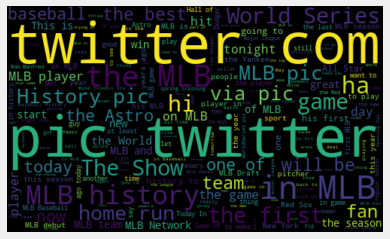

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['tweet'][i])
    print()
    j= j+1

Printing positive tweets:

1) The Cleveland Indians are taking a hard look at their own name.

The MLB franchise released a statement saying the team is "committed to engaging our community and appropriate stakeholders to determine the best path forward with regard to our team name."   

2) Literally buying MLB merchandise putting money in the Astros pocket then paying more to some secondary vendor to prove a point. Lol.   …

3) Mike Trout and Joe Maddon address the MLB's return to play policy, and we get Gubie's thoughts on what lies ahead.

Here's our  digital report on the first day of camp.

_Oneal |  pic.twitter.com/hBrqf364Nt

4) Not until we give more away... the is   Summer Camp not Winter Break... pick up the pace  …

5) This should be a really easy one for MLB and Cleveland. You could have a cool ass Spider logo and it harkens back to baseball history!  pic.twitter.com/Dups2Pjr7y

6) The Cleveland  will consider changing their team name, as first reported by _Rosenthal and . 


1862) Mickey Mantle makes a great running catch on Gil Hodges' deep fly ball to help preserve Don Larsen's 1956 World Series perfect game at Yankee Stadium! MLB Yankees Dodgers Baseball History pic.twitter.com/t485J2n61S

1863) MLB teams are losing a ton of money, of that there’s no doubt. So kudos to the Phillies, Twins, Tigers, Cardinals, Tigers, Twins and others who are continuing to pay employees in full or nearly in full when revenues are zero.

1864) Feleipe Franks (S/R) RHP/QB was drafted in the 31st round of the 2019 MLB draft by the Boston Red Sox and signed. He's technically a professional baseball player. Baseball players tend to find success at Arkansas. Hog football already off to a great start in 2020.

1865) Wei-Yin Chen allowed one earned run over 6.1 innings en route to becoming just the third Taiwanese-born pitcher ever to win a  Postseason game.  pic.twitter.com/iQE0rwQUMO

1866) Look what I just dug up! TBT to boarding a plane with a very, very, very very special t

3861) The  are proud to join with all 30 MLB teams, who have unanimously come together to commit $1 million per team to support their staff, to extend assistance to our part-time hourly staff at ComericaPark.  

3862) I saved $50 from every paycheck starting release date of MLB 19. What does that mean? It didn’t cost me anything to get Mantle. Some of you need use that hating energy and put it towards getting better at budgeting😂

3863) Just watched the replay of the 23-22 game vs the Cubs on MLB network.  Brought back a lot of great memories.  We had a helluva team back then.  There’s another replay on at 7p tonight if you’re looking for something to watch.  Stay safe,and let’s flatten the curve.

3864) The way I see it, there's no way MLB will play 162 games. I say they play exactly 94 so the Rockies can still get to their projected win total.

3865) In addition to joining rest of MLB teams in donating $1 million to fund supporting stadium workers/gameday staff Dodgers will also cont

Gil belongs in Cooperstown.  pic.twitter.com/4AbYj1SVWb

6195) Was not going to get involved with this until I saw this. You bring up Your Clemente Award
"The Award is given annually to the Major League Baseball player who "best exemplifies the game of baseball, sportsmanship, community involvement" yet you act like this.     …

6196) Batter up! Qualifiers for the MLB The Show 19 New Year's Cup start today:    pic.twitter.com/XZWgeCFPAD

6197) We've arrived at Chase Field! ⚾️Today, Campbell becomes one of the first four teams to ever wrestle in a MLB park. First takedown in 2 hours!  pic.twitter.com/KfNLCAgezd

6198) The Phillies & Realmuto will work it out but this isn’t just a battle for him. This is also JT fighting for all Catchers in MLB. One of the most important yet underappreciated positions in all of sports. Involved in every single play on the field. New standards need to be set.

6199) Nico Hoerner

Seasons played for Joe: 2019

Games played for Joe: 20

Maddon-era highlight

8194) Good Luck to the  Tigers in the  World Series - _1, 15, 6! LSUMLB
   pic.twitter.com/7hIpt2m1TW

8195) Happy 91st Birthday Whitey Ford! - The legendary Yankees pitcher was born in NYC on October 21, 1928. Cheers to the "Chairman of the Board"! MLB History pic.twitter.com/7bjAjXr7DP

8196) - 2009 World Series champion 
- 2009 ALCS MVP 
- 3,000 strikeout club
- 2007 AL Cy Young Award 
- 6x All-Star 
- 2x MLB wins leader
- First in wins, complete games, strikeouts and starts among active pitchers

Thank YOU, CC 👏🏾👏🏾👏🏾   …

8197) 10/21/2015 Thanks to home runs from Lucas Duda, Travis d’Arnaud and Daniel Murphy, the Mets sweep the Cubs to advance to their first World Series since 2000. Murphy’s seventh homer of the postseason sets a MLB record for consecutive postseason games with a home run with 6.  pic.twitter.com/PgO0k0Eg9d

8198) Today In 1980: The Philadelphia Phillies win their first World Series championship, defeating the Kansas City Royals in six games! MLB Postseason History


10194) Our first Twitter giveaway!!! Like this tweet, give us a follow and retweet with your favorite MLB team. We will break a box of 2019 Topps Heritage High Number and send out all cards to 30 randomly drawn winners (one for each team) once we hit 500 followers.  pic.twitter.com/kS9yJUB6Iv

10195) Last night will forever be the most exciting MLB game I’ve ever watched. To see your long time friend make his MLB debut is something special! Gavin is a special kid and someone I’ve always looked up to. LA’s got not only a great teammate but a better person🙌🏽   …

10196) NOTICE this?

Canes dominate recruiting. 
Media: "Kill the program"

Marlins "buy" a title in 1997.
Media: "MLB needs a Salary Cap"

Heat pull off the BIG3.
Media: "Fix the CBA, to kill super teams."

Fins sets up a "Tank"
Media:  "Time to do something about Tanking."

10197) My lifetime love & passion for all things Chicago, Cubs, Bears & America, was ignited right there in 1986. 

I obsessed about 🇺🇸 & it’s sports & po

12015) .’s 454 ft bomb gives him his 5th HR of 450+ ft in 2019.
 
That ties him with Josh Bell for the most in .  pic.twitter.com/4mrJWDBP7U

12016) Mike Trout with the rare 2nd-level HR at Dodger Stadium, right down the LF line. 

The 454-foot shot is Trout's 5th HR of 450+ this season, tying Josh Bell for the most in MLB.  pic.twitter.com/I5egYon7qM

12017) Was looking for the best MLB moment of the day: Found it 

 pic.twitter.com/YGyyig66dE

12018) During his most recent "last possible start in an  uniform," Madison Bumgarner delivers a pitch in 3rd inning against . mlb baseball  photo by  pic.twitter.com/A8eMYLsP4l

12019) This throw was so good we needed to show it again. ¯\_(ツ)_/¯ pic.twitter.com/wnoWjInOoG

12020) CELEBRATION OAKLAND A's WIN IN EXTRAS OVER THE ASTROS....MLB COULDN'T HOLD OAKLAND DOWN WITH THAT BS CALL!!!! Athletics RootedInOakland

12021) A perfect throw by Mike Trout 🎯

(via )
 pic.twitter.com/b35yRDICpO

12022) Danny Duffy was spectacular, Ian Kennedy wiggled

In [10]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['tweet'][i])
    print()
    j=j+1

Printing negative tweets:

1) [someone arguing in bad faith against renaming the Washington NFL team or Cleveland MLB team]: what’s next, get rid of the Fighting Irish???
[me, having plotted for years to destroy Notre Dame once and for all]: yes

2) Thank you HOFer Barry Larkin for asking. When I saw Ken Caminiti’s NL MVP award I said on padres broadcasts “Kennesaw Landis Award?” Named for a former MLB commissioner and a stone cold racist who said “A colored will never play in the majors as long as I’m here.”CHANGE IT.

3) Listen up, yo! Attention  and  and all  fans! What a treat  has for all of us tomorrow. Yep... 'The Rick Camp HR' July 4, 1985 game that ended at 4:00am July 5. It was a long day at the yard...BaseballisBack pic.twitter.com/puhOKV9Jkl

4) ESPN posted Trout’s interview and this comment hit me hard. Please  ... market your players before it’s too late  pic.twitter.com/2UJDNEbIo6

5) hate to tell you folks, NHL, NBA, MLB, NFL, NCAA football aren’t playing this year   …



1443) MLB is offering free streams of every game in 2018 and 2019, playoffs included. If you need to kill some time, might I recommend Game 3 of the 2018 World Series, which the Dodgers won after 7 hours and 20 minutes?  …

1444) Day 10 of no baseball: 
- Watched a demo mode game on MLB the Show 
- Put pine tar on my play station controller 
- Showered in my uniform to remember what it’s like to play in the rain
- DMed Jennifer Aniston to remember the embarrassment of giving up a dinger

1445) Ichiro's final career game was a year ago today -- March 21, 2019.

A reminder...

Ichiro's first career MLB game (2001): Mariners beat A's, 5-4

Ichiro's final career MLB game (2019): Mariners beat A's, 5-4

1446) Quote this with a MLB player you thought he would become a star, but became an average player, or a bust. I’ll start with:

Jurickson Profar

1447) Anyone else having crazy trouble inviting a friend to an MLB the Show match and it just puts you in a game with a random person?  ???

14

3109) WorldSeries2019 Game 3 Umpire Report

Name: Gary Cederstrom
Correct Call Rate: 91.5%
Calls helping Nationals: 3
Calls helping Astros: 11
Largest miss: 1.67 inches

Sorry , but a four game sweep isn't good for 's bottom line.  pic.twitter.com/BI7BhAGzbV

3110) Filthy. 

(MLB x ) pic.twitter.com/c3hVYcKrRM

3111) Well I guess this means Trump will attend a World Series game after all. Just what MLB needs!

3112) Not sure why they are Gator Chomping at the World Series but 🤷‍♂️. (via )  pic.twitter.com/yhXEDcy1Cc

3113) serious question can i sue MLB for this   …

3114) Didn't take long for the  to get that run back. WorldSeries pic.twitter.com/fJ0ed5a3Fi

3115) 1st WorldSeries run at home and they are going crazy in D.C. pic.twitter.com/ADMr0w9xRv

3116) With that 3rd-inning double, Jose Altuve has reached base safely in 23 straight postseason games. It ties as the 7th-longest of such a streak in MLB history. Others with 23-game streaks: Lance Berkman (2005-11) and Lou Gehrig (1928

KeyboardInterrupt: 

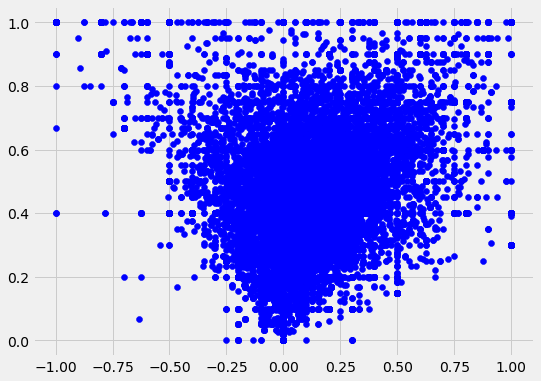

In [11]:
# Plotting 
plt.figure(figsize=(8,6)) 
plt.scatter(df["Polarity"], df["Subjectivity"], color='Blue')

# for i in range(0, df.shape[0]):
#   plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 

# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [12]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweet']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

48.6

In [13]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweet']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

18.6

In [14]:
# Show the value counts
df['Analysis'].value_counts()

Positive    12079
Neutral      8134
Negative     4622
Name: Analysis, dtype: int64

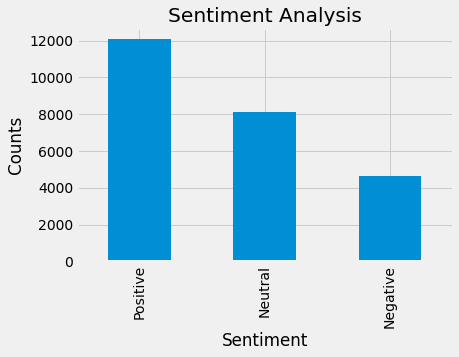

In [15]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()